# ABOUT THE PROJECT

Topic: <b> Data Scientist - where to earn the most? Analysis for USA. </b>
<br> <br>
This paper is a final project for the course <i> "Applications of the Python Language" </i> (Faculty of Economic Sciences, University of Warsaw), written in a group of two with Monika Kot.
<br> <br>
Data source: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor
<br> <br>
<u> Research questions & conclusions from the project: </u>
<br>
1. Does the salary depend on the place of residence?
    > Yes, it does. Higher salaries have been observed in the eastern US.
2. Where is the easiest place to find a job?
    > Jobs are the easiest to find in California, Massachusetts and in New York (there were the most job offers in those states).
3. What are the most in-demand skills in the market of data scientists?
    > The most demanded skills are: Python, Excel and SQL. All of these appeared as necessary on the job offers more than 350 times (out of 742 total).
4. In which industry can you earn the most?
    > The highest earnings (average salaries) were recorded in the following sectors: Other retail stores (~ 163,5k), Motion Picture Production (~ 146k), Financial Analytics & Research (~ 145,1k).




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd 

In [2]:
df = pd.read_csv('data_cleaned_2021.csv')

In [3]:
len(df)

742

# #1 PIE CHART OF JOB TITLES

In [4]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [5]:
df=df.drop(labels=['index', 'Job Description','Headquarters','Competitors','Hourly','Employer provided',
                 'Job Location','seniority_by_title','Degree'], axis=1) #getting rid of unnecessary columns

In [6]:
df['job_title_sim'].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

In [7]:
df[df['job_title_sim']=='Data scientist project manager']='data scientist' #practically the same category

In [8]:
df['job_title_sim'] = df['job_title_sim'].apply(lambda x: x.title())

In [9]:
df['job_title_sim']

0       Data Scientist
1       Data Scientist
2       Data Scientist
3       Data Scientist
4       Data Scientist
            ...       
737    Other Scientist
738      Data Engineer
739    Other Scientist
740     Data Scientist
741    Other Scientist
Name: job_title_sim, Length: 742, dtype: object

In [10]:
df['job_title_sim'].value_counts() #data for pie chart

Data Scientist               329
Other Scientist              143
Data Engineer                119
Analyst                      101
Machine Learning Engineer     22
Na                            10
Data Analitics                 8
Data Modeler                   5
Director                       5
Name: job_title_sim, dtype: int64

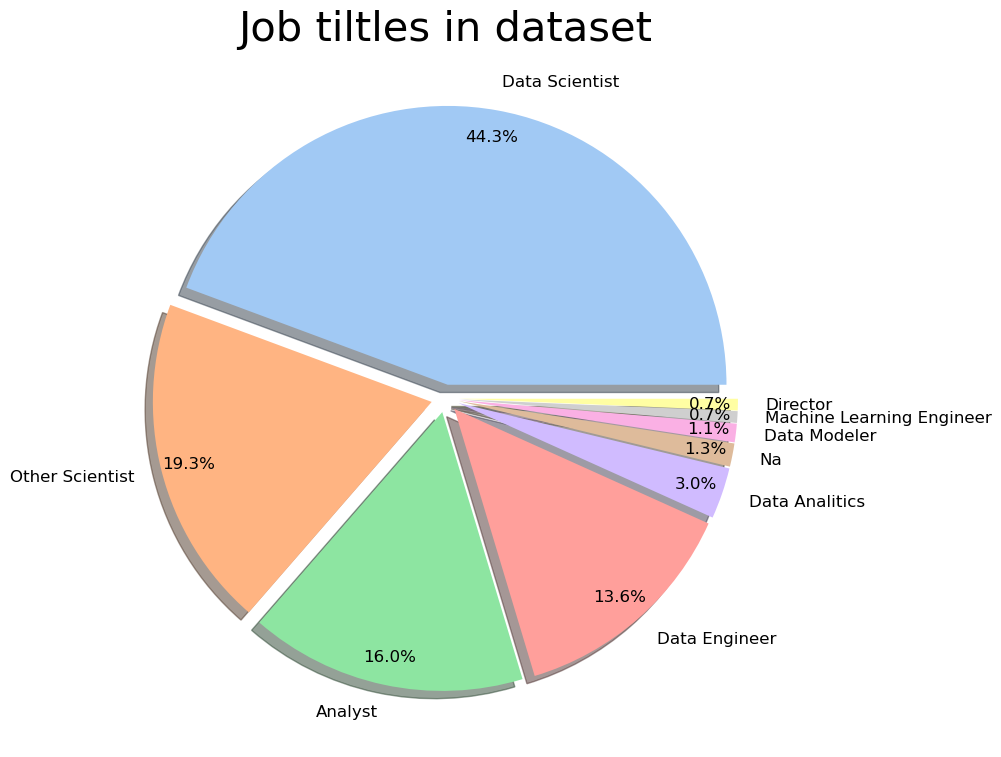

In [11]:
plt.rcParams["figure.figsize"] = (10,10)
plt.pie(df['job_title_sim'].value_counts(),
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel'),
        labels=df['job_title_sim'].unique(),
        explode=(0.05, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),
        textprops={'fontsize': 12},
        pctdistance=0.9,
        shadow=True)
plt.title("Job titles in dataset", size=30)

plt.tight_layout()
 
#plt.tight_layout()
#plt.savefig('jobtitles.jpg')

# #2 BARPLOT OF THE MOST IMPORTANT SKILLS

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'company_txt', 'Age',
       'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an', 'job_title_sim'],
      dtype='object')

In [13]:
df['Python'].unique() #checking possible values occuring in a column

array([1, 0, 'data scientist'], dtype=object)

In [14]:
#lookind for different incorrect values other than 'data scientist' in all columns associated with skills 
#(there should only be binary values)

def unique_values_in_df(df, list_of_columns):
    """
    Function to find all unique values in specified columns of a dataset
    Arguments: 
        df - dataset
        list_of_columns - lista kolumn, z których chcemy pozyskać unikatowe wartości
    """
    list_of_unique = []
    for column in list_of_columns:
            for item in df[column].unique().tolist():
                if item not in list_of_unique:
                    list_of_unique.append(item)
    return list_of_unique

#help(unique_values_in_df)

In [15]:
unique_values_in_df(df, ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an'])

[1, 0, 'data scientist']

In [16]:
#deleting rows with incorrect data

elements = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

for column in elements:
    for row, item in enumerate(df[column]):    
        if item == 'data scientist':
            df.drop(index=row, inplace=True)
            
df = df.reset_index()

In [17]:
df_skills = df[['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']] 

In [18]:
unique_values_in_df(df_skills, ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an']) #now all the values look right

[1, 0]

In [19]:
skills = df_skills.sum(axis = 0)

In [20]:
skills_df = pd.DataFrame(data=skills, columns=['Number of offers']).sort_values(by='Number of offers', ascending=True)

In [21]:
skills_df

,Number of offers
flink,10
google_an,14
keras,29
mongo,37
pytorch,39
scikit,54
bi,54
sas,66
tensor,72
hadoop,124


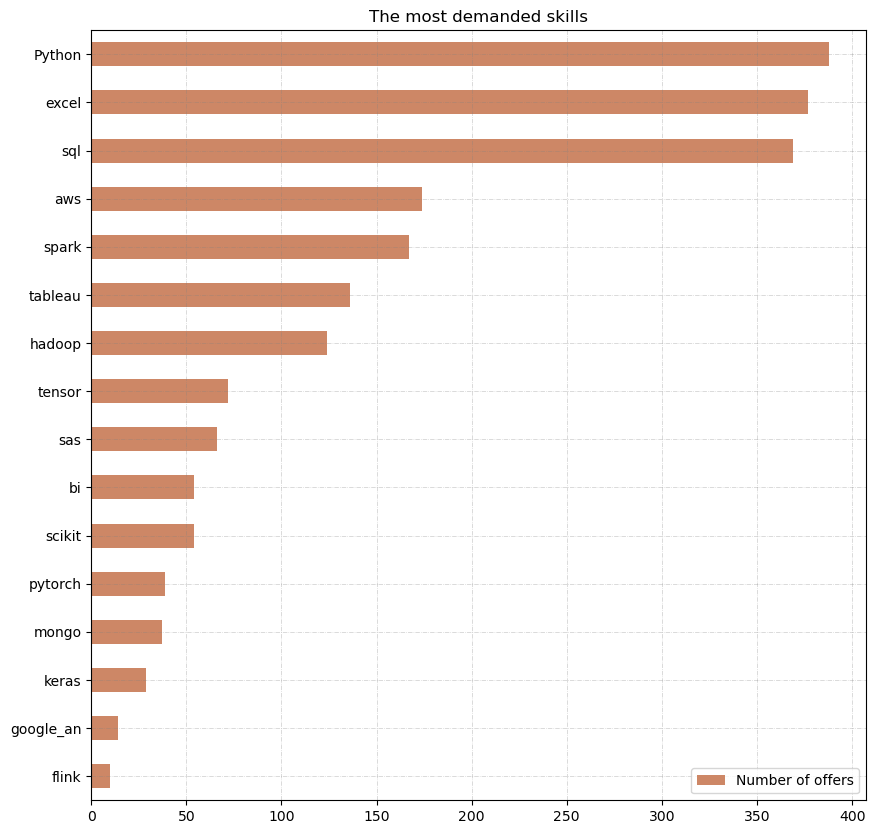

In [22]:
skills_df.plot(kind="barh", color='#cd8766')
plt.rcParams["figure.figsize"] = (10,8)
plt.title("The most demanded skills")
#plt.ylabel("Skill")
#plt.xlabel("Number of offers")

plt.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4, label=True)


#plt.tight_layout()
#plt.savefig('mostdemandedskills.jpg')

# #3 MAP CHART OF AVERAGE SALARIES BY STATE

In [23]:
df[['Avg Salary(K)','Location']]

,Avg Salary(K),Location
0,72.0,"Albuquerque, NM"
1,87.5,"Linthicum, MD"
2,85.0,"Clearwater, FL"
3,76.5,"Richland, WA"
4,114.5,"New York, NY"
...,...,...
721,84.5,"Cambridge, MA"
722,102.5,"Nashville, TN"
723,73.5,"Pittsburgh, PA"
724,127.5,"Allentown, PA"


In [24]:
df[['City', 'State']] = df.Location.str.split(", ", expand = True, n=1)

In [25]:
df['State'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'Los Angeles, CA', 'UT',
       'TN', 'DE', 'ID', 'RI', 'IA', 'SC', 'KS'], dtype=object)

In [26]:
df[(df['State']=='Los Angeles, CA')]

,index,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,City,State
126,126,Data Scientist,$82K-$133K (Glassdoor est.),3.6,Accuride International\n3.6,"Santa Fe Springs, Los Angeles, CA",1001 - 5000,1966,Company - Private,Industrial Manufacturing,...,0,0,1,0,0,0,1,Data Scientist,Santa Fe Springs,"Los Angeles, CA"


In [27]:
#fixing wrongly assigned value
for row, item in enumerate(df['State']):
    if item == 'Los Angeles, CA':
        df.loc[row, 'City'] = 'Santa Fe Springs, Los Angeles'
        df.loc[row, 'State'] = 'CA'

In [28]:
len(df['State'].unique()) #there are 37 states in the dataframe

37

In [29]:
states_df = df[['Avg Salary(K)','City', 'State']]

In [30]:
states_df

,Avg Salary(K),City,State
0,72.0,Albuquerque,NM
1,87.5,Linthicum,MD
2,85.0,Clearwater,FL
3,76.5,Richland,WA
4,114.5,New York,NY
...,...,...,...
721,84.5,Cambridge,MA
722,102.5,Nashville,TN
723,73.5,Pittsburgh,PA
724,127.5,Allentown,PA


In [31]:
df['Avg Salary(K)'].agg(['count', 'nunique', 'min', 'max']) #basic stats. There is a huge difference between the minimum and maximum value.

count      726.0
nunique    216.0
min         15.5
max        254.0
Name: Avg Salary(K), dtype: float64

In [32]:
#loading a file necessary to make a map chart
geo = gpd.read_file('cb_2020_us_state_500k.shp')
display(geo.head())

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
1,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868948653,4922329963,"MULTIPOLYGON (((-65.23805 18.32167, -65.23467 ..."
2,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,01,01779775,0400000US01,01,AL,Alabama,00,131175460655,4591915034,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
4,13,01705317,0400000US13,13,GA,Georgia,00,149486234922,4418749570,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."


In [33]:
states_df = states_df.rename(columns={'State': 'STUSPS'}) #changing the column name to merge it with geo dataframe.

In [34]:
geo_merged = geo.merge(states_df, on = 'STUSPS')
geo_merged.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Avg Salary(K),City
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",72.0,Albuquerque
1,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",75.5,Albuquerque
2,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",75.5,Albuquerque
3,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",114.0,San Jose
4,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",163.5,San Jose


Text(0.5, 1.0, 'Average Salary (1000 USD) by State')

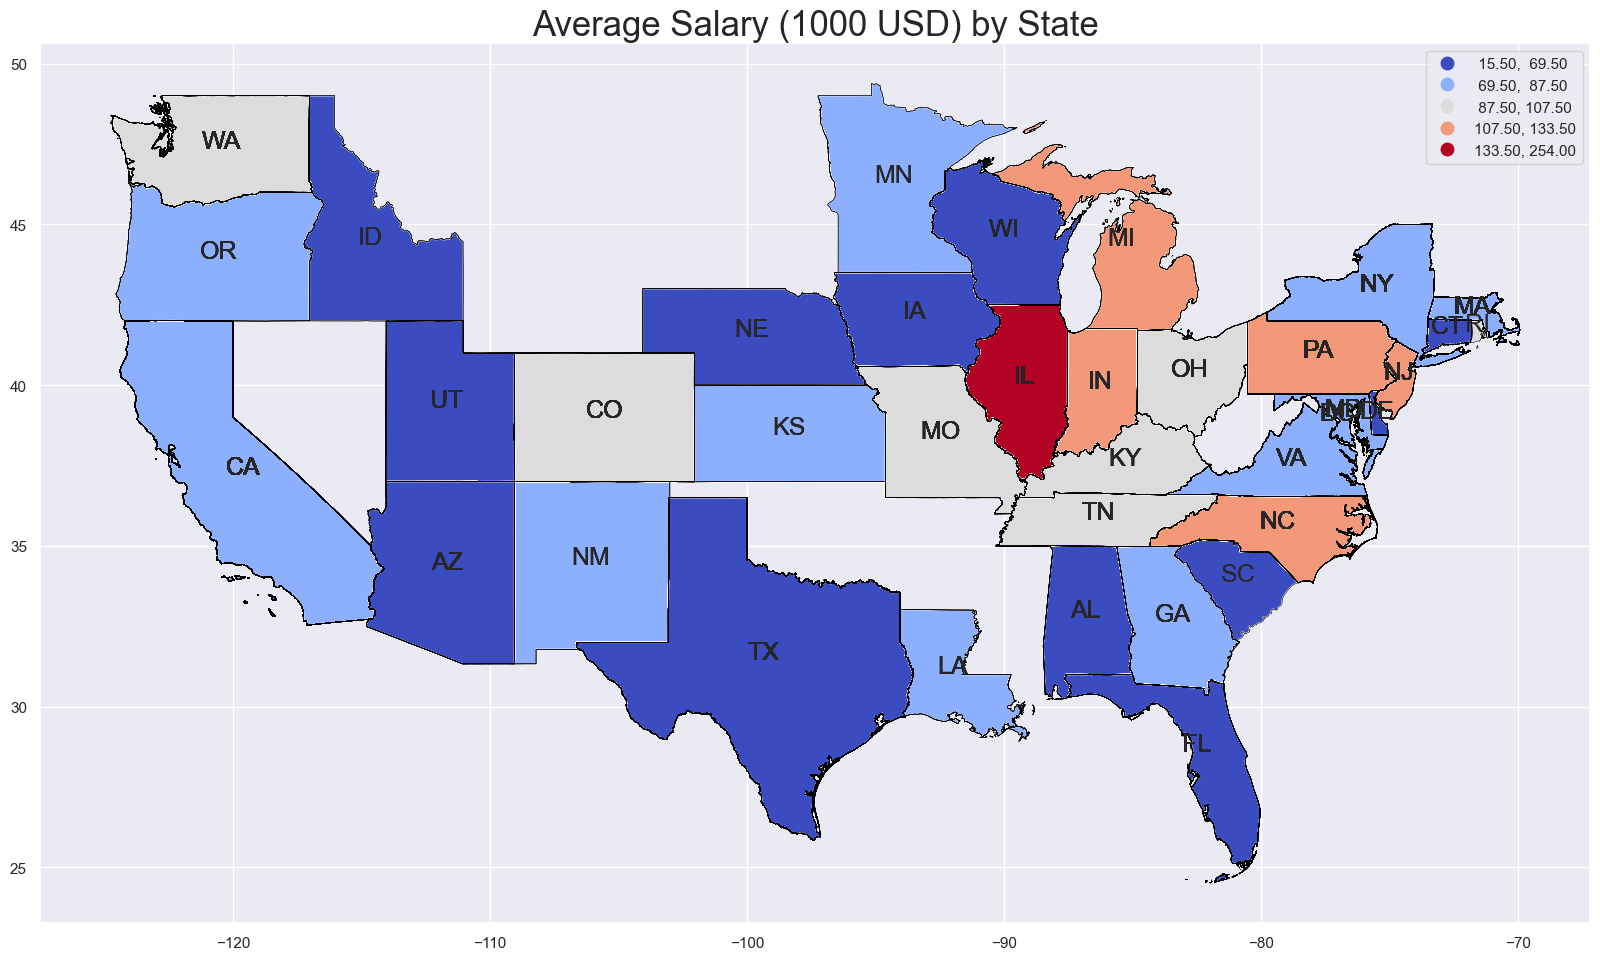

In [35]:
sns.set_theme(style = 'darkgrid')

fig = plt.figure(1, figsize=(20,20)) 
ax = fig.add_subplot()


geo_merged.apply(lambda x: ax.annotate(
    x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center',fontsize=18),axis=1);
geo_merged.boundary.plot(ax=ax, color='black', linewidth=.4)
geo_merged.plot(ax=ax, figsize=(30, 20),
               column = 'Avg Salary(K)', scheme = 'Quantiles', legend = True, cmap = 'coolwarm')
ax.set_title('Average Salary (1000 USD) by State', fontsize=25)
#plt.show()

#plt.tight_layout()
#plt.savefig('geochart.jpg')

# #4 BARPLOT OF THE HIGHEST PAID INDUSTRIES

In [36]:
df.keys()

Index(['index', 'Job Title', 'Salary Estimate', 'Rating', 'Company Name',
       'Location', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'company_txt', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'job_title_sim', 'City', 'State'],
      dtype='object')

In [37]:
df['Industry'].value_counts() #incorrect category called '-1'

Biotech & Pharmaceuticals                   111
Insurance Carriers                           61
Computer Hardware & Software                 56
IT Services                                  50
Health Care Services & Hospitals             45
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      23
Research & Development                       19
Consumer Products Manufacturing              18
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
-1                                           10
Travel Agencies                               8
Lending                                       8
Staffing & Outsourcing                        8
Food & Beverage Manufacturing           

In [38]:
for row, item in enumerate(df['Industry']):    
    if item == '-1':
        df.drop(index=row, inplace=True)
df = df.reset_index()

In [39]:
#quick data overview
df.groupby(['Industry']).agg({'Avg Salary(K)':['mean', 'sum', 'count', 'min', 'max']})

Avg Salary(K)                        \
                                                  mean      sum count    min   
Industry                                                                       
Accounting                                  113.500000    113.5     1  113.5   
Advertising & Marketing                     105.760870   2432.5    23   56.5   
Aerospace & Defense                          99.060000   2476.5    25   59.0   
Architectural & Engineering Services         50.500000    202.0     4   39.5   
Auctions & Galleries                        128.000000    128.0     1  128.0   
Banks & Credit Unions                        70.625000    847.5    12   49.0   
Beauty & Personal Accessories Stores         85.500000     85.5     1   85.5   
Biotech & Pharmaceuticals                   112.261261  12461.0   111   62.0   
Brokerage Services                          129.000000    258.0     2   85.0   
Colleges & Universities                     102.687500   1643.0    16   61.5   
Computer Hardware & Software                118.071429   6612.0    56   49.0   
Construction                                 55.000000    165.0     3   55.0   
Consulting                                  108.689655   3152.0    29   52.5   
Consumer Product Rental                      86.666667    260.0     3   65.0   
Consumer Products Manufacturing              93.777778   1688.0    18   47.0   
Department, Clothing, & Shoe Stores          92.666667    556.0     6   51.5   
Education Training Services                  79.500000    238.5     3   75.5   
Energy                                       80.464286   1126.5    14   61.0   
Enterprise Software & Network Solutions     115.369048   4845.5    42   29.5   
Farm Support Services                        80.500000     80.5     1   80.5   
Federal Agencies                             80.500000    885.5    11   41.5   
Financial Analytics & Research              145.125000   1161.0     8   85.0   
Financial Transaction Processing             83.500000    334.0     4   27.5   
Food & Beverage Manufacturing                53.250000    426.0     8   52.5   
Gambling                                     48.500000    194.0     4   48.5   
Gas Stations                                 98.000000    392.0     4   98.0   
Health Care Products Manufacturing           73.000000     73.0     1   73.0   
Health Care Services & Hospitals             78.222222   3520.0    45   42.0   
Health, Beauty, & Fitness                   139.500000    139.5     1  139.5   
IT Services                                 102.840000   5142.0    50   48.0   
Industrial Manufacturing                     86.750000    347.0     4   77.5   
Insurance Agencies & Brokerages             109.250000    655.5     6   94.5   
Insurance Carriers                          107.024590   6528.5    61   45.5   
Internet                                    123.810345   3590.5    29   47.0   
Investment Banking & Asset Management       118.400000    592.0     5   63.5   
K-12 Education                              108.875000    435.5     4   59.5   
Lending                                      83.000000    664.0     8   43.0   
Logistics & Supply Chain                     98.250000    393.0     4   84.0   
Metals Brokers                              107.000000    214.0     2  107.0   
Mining                                       98.000000     98.0     1   98.0   
Motion Picture Production & Distribution    146.000000    146.0     1  146.0   
Other Retail Stores                         163.500000    163.5     1  163.5   
Real Estate                                 104.750000    838.0     8   92.5   
Religious Organizations                      78.833333    473.0     6   50.0   
Research & Development                       78.394737   1489.5    19   15.5   
Security Services                            93.500000    654.5     7   61.0   
Social Assistance                            48.166667    144.5     3   44.5   
Sporting Goods Stores                    

In [40]:
salary_by_industry = df.groupby('Industry')['Avg Salary(K)'].mean().to_frame().sort_values('Avg Salary(K)', ascending=False)

In [41]:
#mean salary for each industry sorted from the highest to the lowest
salary_by_industry.head()

,Avg Salary(K)
Industry,
Other Retail Stores,163.500
Motion Picture Production & Distribution,146.000
Financial Analytics & Research,145.125
"Health, Beauty, & Fitness",139.500
Telecommunications Services,131.500


In [42]:
#taking top 20 highest paid industries
salary_by_industry_top20 = salary_by_industry[(salary_by_industry['Avg Salary(K)'] > 107.024590)]
salary_by_industry_top20

,Avg Salary(K)
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Staffing & Outsourcing,118.437500


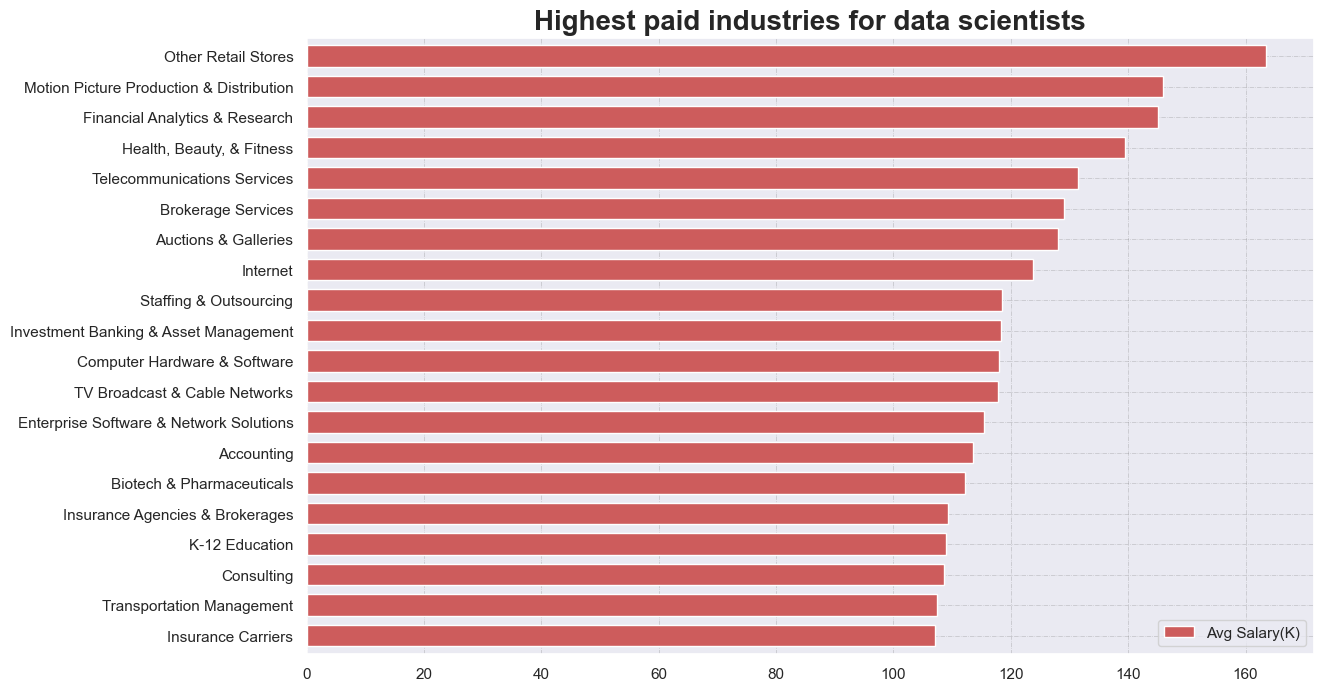

In [43]:
plt.rcParams["figure.figsize"] = (13,8)
fig = salary_by_industry_top20.plot(kind="barh", color='indianred', width = 0.7)
fig.invert_yaxis()
plt.title("Highest paid industries for data scientists", fontsize = 20, fontweight="bold")
plt.ylabel("")
plt.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)

# plt.tight_layout()
# plt.savefig('highestpaid.jpg')

# #5 JOB OFFERS PER STATE

In [44]:
df['Company Name'] #in the column of the company name there is also a rating of the company, which will not be used, so getting rid of it.

0                          Tecolote Research\n3.8
1      University of Maryland Medical System\n3.4
2                                    KnowBe4\n4.8
3                                       PNNL\n3.8
4                         Affinity Solutions\n2.9
                          ...                    
711                                      GSK\n3.9
712                               Eventbrite\n4.4
713           Software Engineering Institute\n2.6
714                             Numeric, LLC\n3.2
715             Riverside Research Institute\n3.6
Name: Company Name, Length: 716, dtype: object

In [45]:
df['Company'] = df['Company Name'].str.split('\n').str[0]
df['Company']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
711                                      GSK
712                               Eventbrite
713           Software Engineering Institute
714                             Numeric, LLC
715             Riverside Research Institute
Name: Company, Length: 716, dtype: object

In [46]:
job_offers_df = df[['State', 'Company', 'Avg Salary(K)', 'Lower Salary', 'Upper Salary']]
job_offers_df

,State,Company,Avg Salary(K),Lower Salary,Upper Salary
0,NM,Tecolote Research,72.0,53,91
1,MD,University of Maryland Medical System,87.5,63,112
2,FL,KnowBe4,85.0,80,90
3,WA,PNNL,76.5,56,97
4,NY,Affinity Solutions,114.5,86,143
...,...,...,...,...,...
711,MA,GSK,84.5,58,111
712,TN,Eventbrite,102.5,72,133
713,PA,Software Engineering Institute,73.5,56,91
714,PA,"Numeric, LLC",127.5,95,160


In [47]:
job_offers_df.dtypes

State            object
Company          object
Avg Salary(K)    object
Lower Salary     object
Upper Salary     object
dtype: object

In [48]:
job_offers_df = job_offers_df.astype({'Avg Salary(K)':'float','Lower Salary':'float','Upper Salary':'float'})

In [49]:
job_offers_df.dtypes

State             object
Company           object
Avg Salary(K)    float64
Lower Salary     float64
Upper Salary     float64
dtype: object

In [50]:
most_offers_stats = job_offers_df.groupby(['State']).agg({'Company':'count',
                                                          'Avg Salary(K)':'mean',
                                                          'Lower Salary':'mean',
                                                          'Upper Salary':'mean'}).sort_values('Company', ascending=False).head(5)
most_offers_stats

,Company,Avg Salary(K),Lower Salary,Upper Salary
State,,,,
CA,144,126.708333,94.868056,158.548611
MA,92,107.619565,77.836957,137.402174
NY,71,98.485915,72.000000,124.971831
VA,41,95.621951,70.024390,121.219512
IL,40,116.662500,88.350000,144.975000


In [51]:
most_offers_stats['State'] = ['CA', 'MA', 'NY', 'VA', 'IL']
most_offers_stats['State_full'] = ['California', 'Massachusetts', 'New York', 'Virginia', 'Illinois']
most_offers_stats.rename(columns = {'Company':'Number of companies in the state',
                                    'Lower Salary':'Lowest Salary',
                                    'Upper Salary':'Highest Salary',
                                    'Avg Salary(K)':'Average Salary(K)'}, inplace = True)
most_offers_stats

,Number of companies in the state,Average Salary(K),Lowest Salary,Highest Salary,State,State_full
State,,,,,,
CA,144,126.708333,94.868056,158.548611,CA,California
MA,92,107.619565,77.836957,137.402174,MA,Massachusetts
NY,71,98.485915,72.000000,124.971831,NY,New York
VA,41,95.621951,70.024390,121.219512,VA,Virginia
IL,40,116.662500,88.350000,144.975000,IL,Illinois


The most job offers are in CA (California), MA (Massachusetts), NY (New York), VA (Virginia), IL (Illinois). On the chart below there are mean salaries from the jobs in these states.

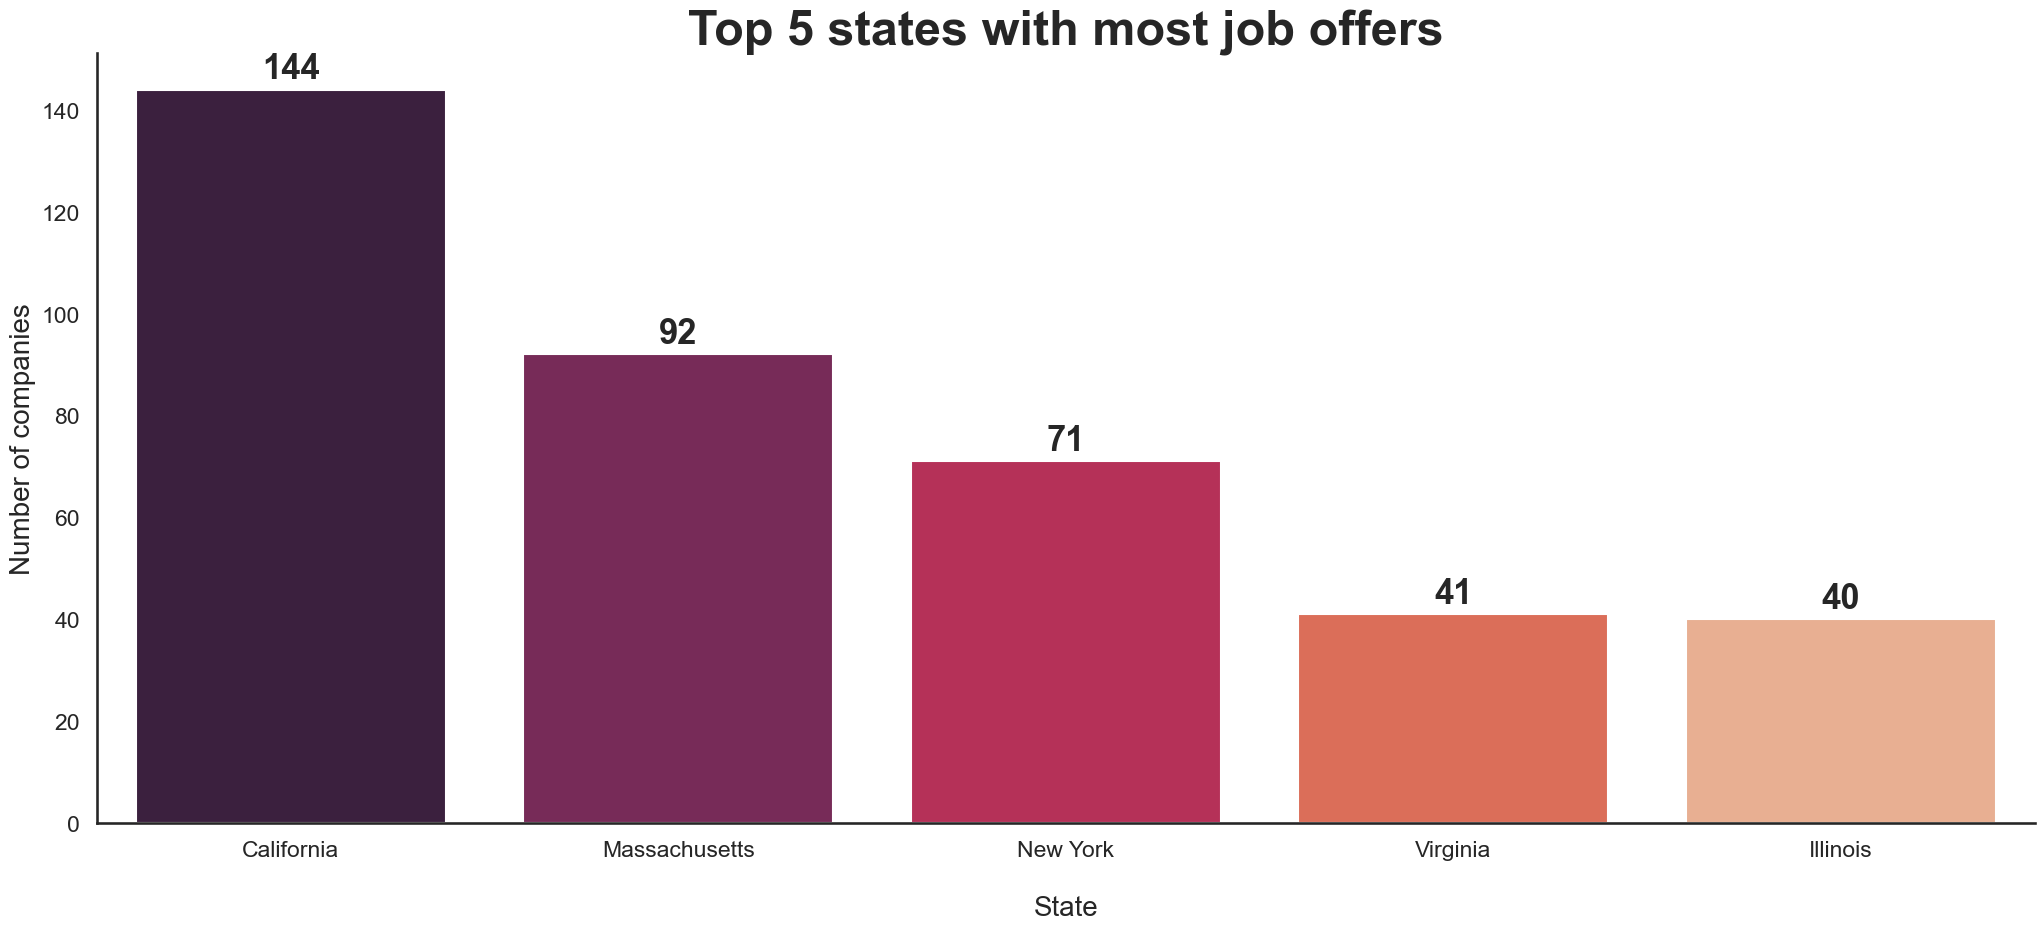

In [52]:
sns.set_theme(style="white", context="talk")
f, axes = plt.subplots(figsize=(25,10))

a = sns.barplot(data=most_offers_stats, x='State_full', y='Number of companies in the state', palette="rocket")
axes.set_ylabel('Number of companies', size = 20)
axes.set_xlabel('State', size = 20, labelpad = 25)
axes.set_title('Top 5 states with most job offers', size = 35, fontweight = 'bold')
for i in a.containers:
    a.bar_label(i, padding = 3, fontsize=25, fontweight = 'bold') 
    
sns.despine()
#plt.tight_layout()
#plt.savefig('top5states.jpg')

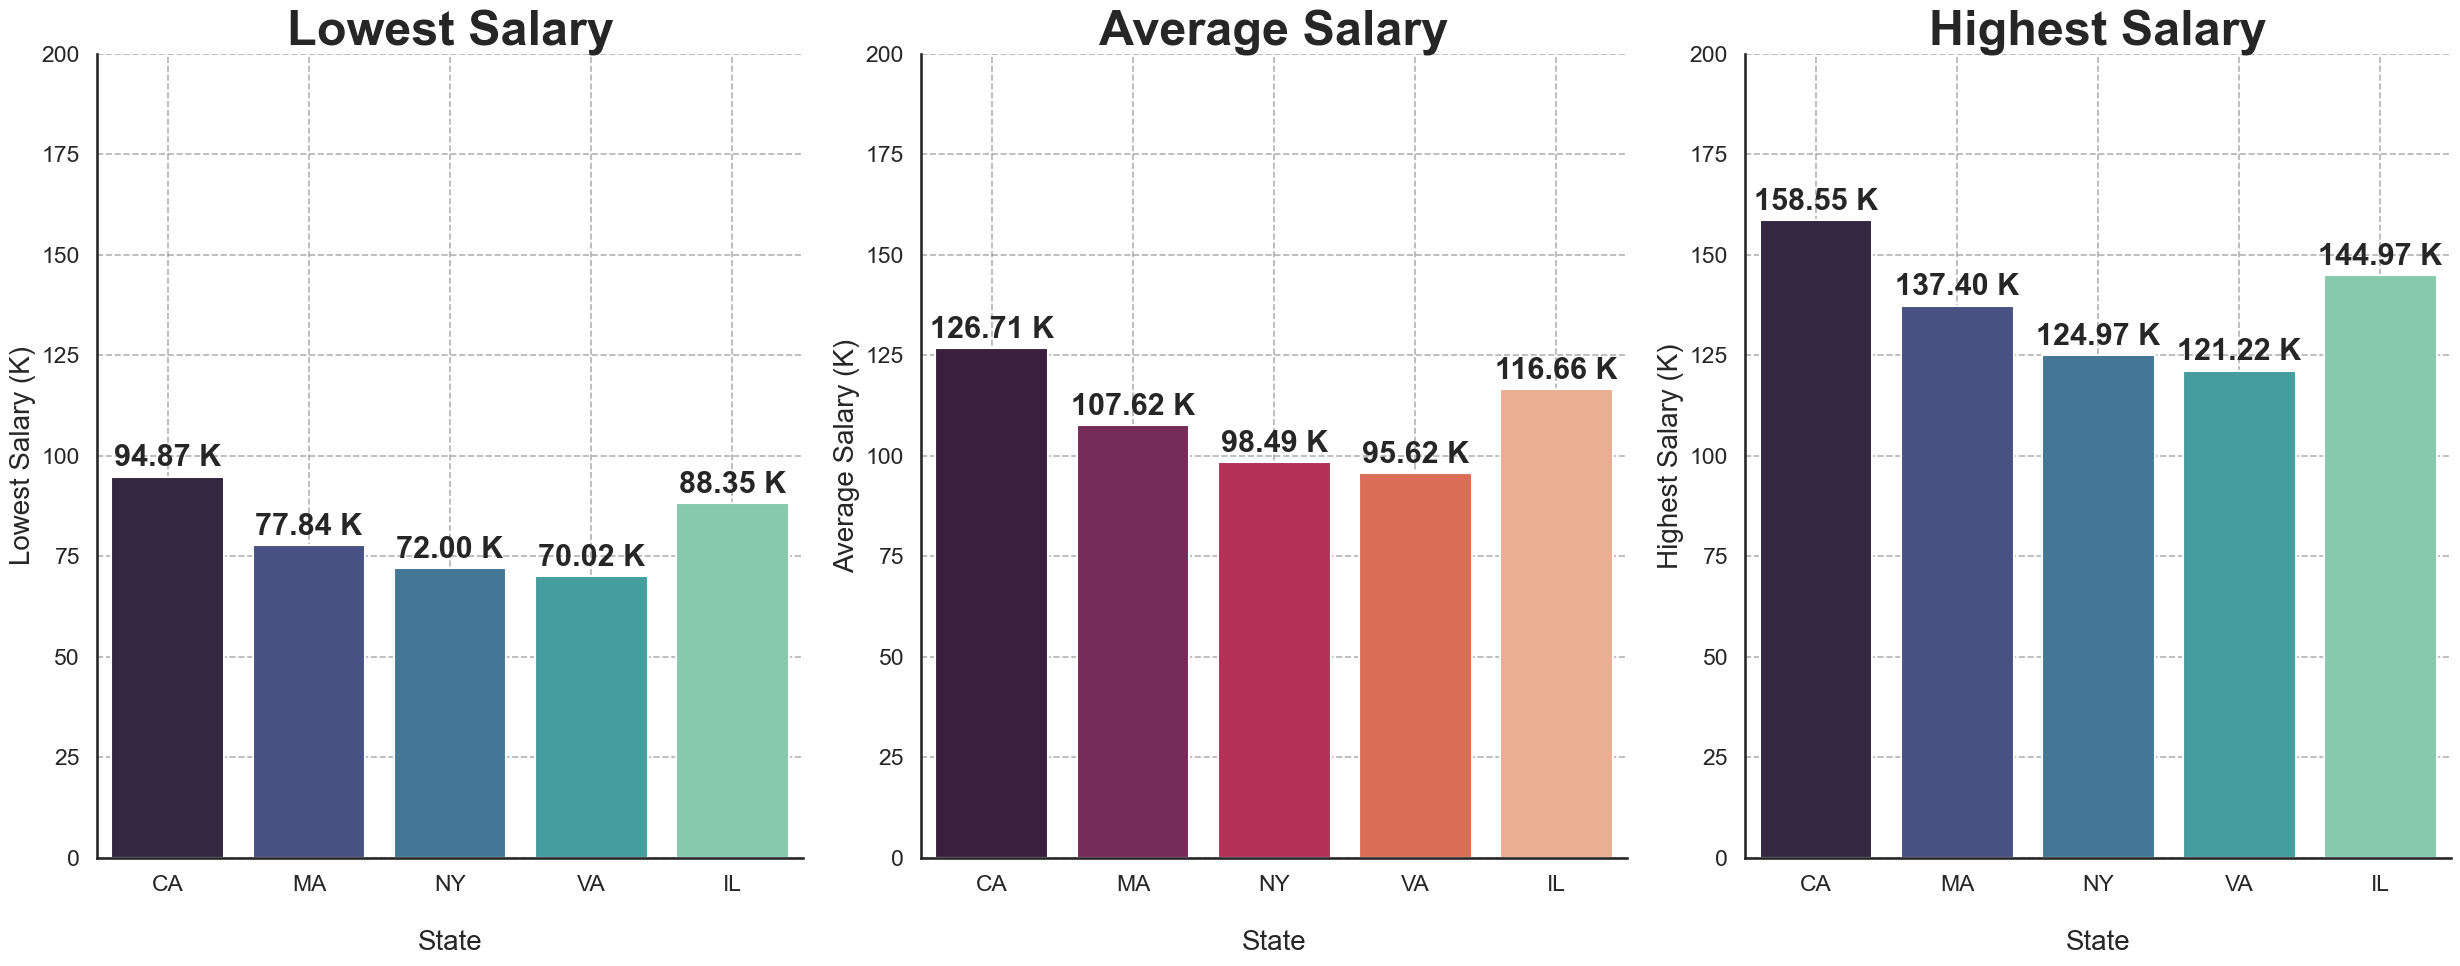

In [53]:
sns.set_theme(style="white", context="talk")
f, axes = plt.subplots(1, 3,  figsize=(25,10))

b = sns.barplot(data=most_offers_stats, x='State', y='Lowest Salary', palette="mako", ax=axes[0])
axes[0].grid( color ='grey', linestyle ='--', linewidth = 1.2, alpha = 0.6)
axes[0].set_ylabel('Lowest Salary (K)', size = 20)
axes[0].set_xlabel('State', size = 20, labelpad = 25)
axes[0].set_title('Lowest Salary', size = 35, fontweight = 'bold')
for i in b.containers:
    b.bar_label(i, padding = 3, fmt='%.2f K', fontsize=22, fontweight = 'bold')
         
c = sns.barplot(data=most_offers_stats, x='State', y='Average Salary(K)', palette="rocket", ax=axes[1])
axes[1].grid( color ='grey', linestyle ='--', linewidth = 1.2, alpha = 0.6)
axes[1].set_ylabel('Average Salary (K)', size = 20)
axes[1].set_xlabel('State', size = 20, labelpad = 25)
axes[1].set_title('Average Salary', size = 35, fontweight = 'bold')
for i in c.containers:
    c.bar_label(i, padding = 3, fmt='%.2f K', fontsize=22, fontweight = 'bold') 
    
d = sns.barplot(data=most_offers_stats, x='State', y='Highest Salary', palette="mako", ax=axes[2])
axes[2].grid( color ='grey', linestyle ='--', linewidth = 1.2, alpha = 0.6)
axes[2].set_ylabel('Highest Salary (K)', size = 20)
axes[2].set_xlabel('State', size = 20, labelpad = 25)
axes[2].set_title('Highest Salary', size = 35, fontweight = 'bold')
for i in d.containers:
    d.bar_label(i, padding = 3, fmt='%.2f K', fontsize=22, fontweight = 'bold') 
                
axes[0].set_ylim(0, 200)
axes[1].set_ylim(0, 200)
axes[2].set_ylim(0, 200)

sns.despine()


plt.tight_layout()
#plt.savefig('salaries.jpg')

The charts above take into account intervals from dataframe.

In [54]:
job_offers_df1 = job_offers_df[(job_offers_df['State'] == 'CA') | (job_offers_df['State'] == 'MA') | (job_offers_df['State'] == 'NY') | (job_offers_df['State'] == 'VA') | (job_offers_df['State'] == 'IL')]
job_offers_df1

,State,Company,Avg Salary(K),Lower Salary,Upper Salary
4,NY,Affinity Solutions,114.5,86.0,143.0
7,CA,Logic20/20,114.0,86.0,142.0
8,NY,Rochester Regional Health,61.0,38.0,84.0
9,NY,<intent>,140.0,120.0,160.0
10,CA,Wish,163.5,126.0,201.0
...,...,...,...,...,...
706,CA,CK-12 Foundation,111.0,80.0,142.0
707,CA,Life360,138.5,99.0,178.0
708,MA,MassMutual,68.5,37.0,100.0
709,CA,Fivestars,87.5,62.0,113.0


On the boxplots below that take into account average salaries we can see that the lowest salary in California is higher (around 50k) than it would appear from the 'Lower Salary' column (31k) 

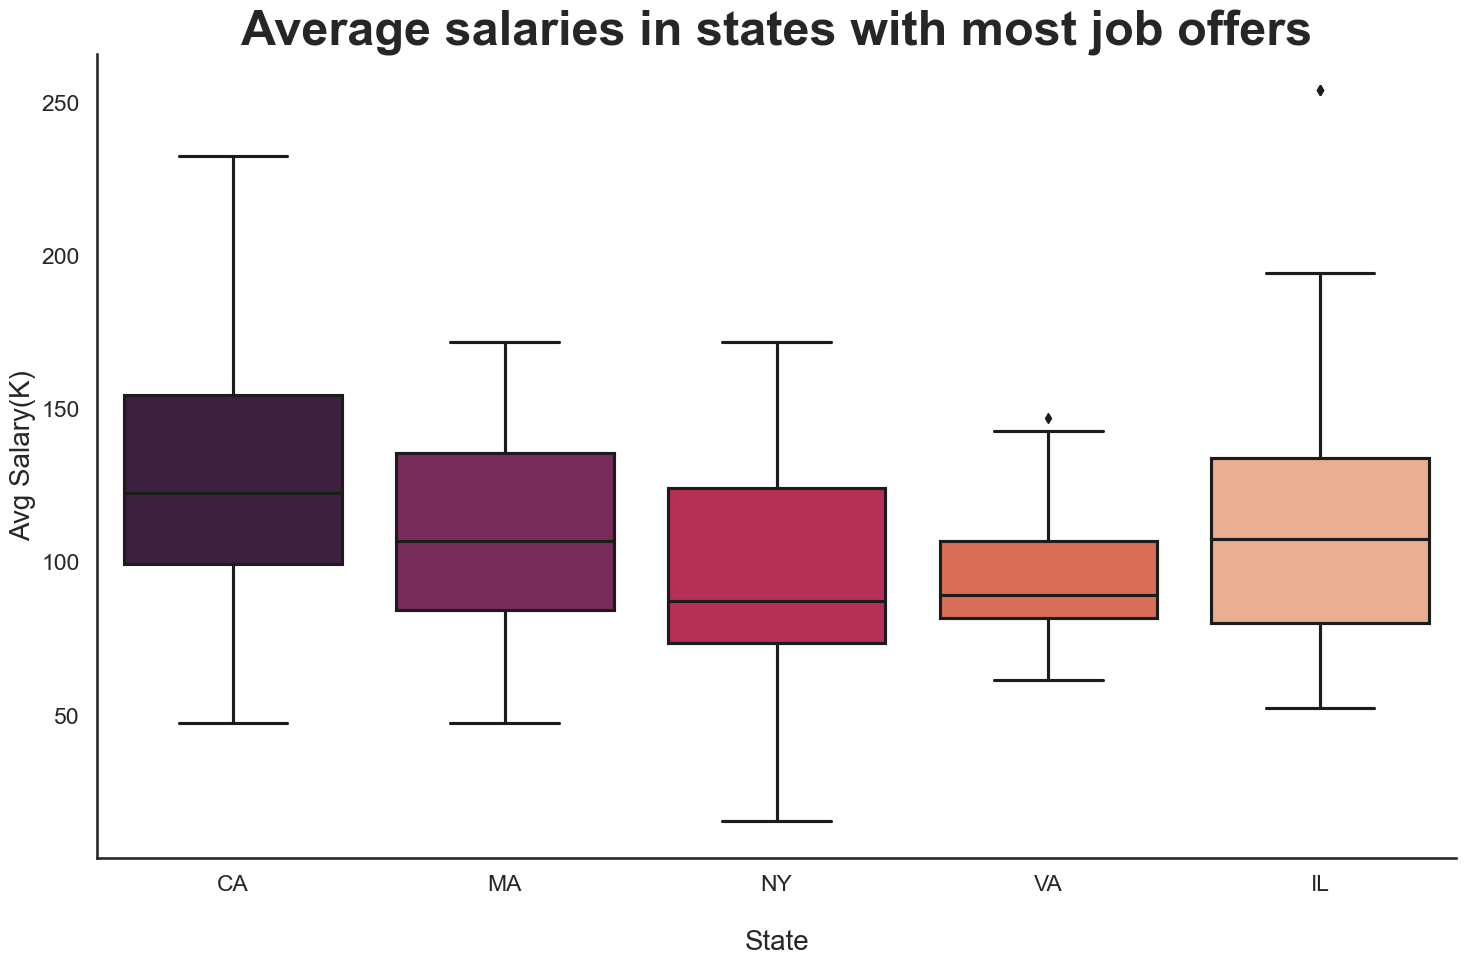

In [55]:
sns.set_theme(style="white", context="talk")
f, axes = plt.subplots(figsize=(15,10))

sns.boxplot(data = job_offers_df1, x = 'State', y = 'Avg Salary(K)',
            order = ['CA', 'MA', 'NY', 'VA', 'IL'], palette = 'rocket')
axes.set_ylabel('Avg Salary(K)', size = 20)
axes.set_xlabel('State', size = 20, labelpad = 25)
axes.set_title('Average salaries in states with most job offers', size = 35, fontweight = 'bold')
sns.despine()

plt.tight_layout()
#plt.savefig('boxplot_salary.jpg')